# Como funciona o Qiskit

Qiskit é uma ferramenta open-source para trabalhar com computadores quânticos. Utilizamos a linguagem de programação Python para criação destes circuitos, que podem ser executados não só em um simulador, como também em um computador quântico real. Agora, entenderemos o processo de criação de um circuito quântico construindo um exemplo de circuito. Geralmente, temos um passo a passo para esse processo:

1. Importar pacotes
1. Inicializar variáveis
1. Adicionar portas
1. Visualizar o circuito
1. Simular o experimento
1. Visualizar os resultados

## Importando as bibliotecas
As ferramentas básicas necessárias para a construção de um circuito quântico:

In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile #Tem todas as operações/portas quânticas. 
from qiskit.providers.aer import QasmSimulator #É o simulador Aer
from qiskit.visualization import plot_histogram #Cria histogramas (Gráfico)

Com ```QuantumCircuit(int, int)```, criamos um circuito e o guardamos em uma variável. Neste exemplo, iniciamos com 2 qubits no estado zero, e 2 bits clássicos também em 0.

In [2]:
circuito = QuantumCircuit(2, 2)

## Adicionando portas

In [3]:
circuito.h(0) #Porta de Hadamard
circuito.cx(0, 1) #Porta C-not
circuito.measure([0, 1], [0, 1]) #Realiza a medição

As portas Hadamard (coloca o qubit em estado de superposição), seguida de uma porta CNOT (no qubit de controle 0 e no qubit de destino 1), colocam os dois qubits nesse estado de Bell:

$$
    \left| \psi\right> = \frac{\left| 00 \right> + \left| 11 \right>}{\sqrt{2}}
$$

Nos estados de Bell, os qubits se encontram etrelaçados. Entenda os parâmetros de `mensure` como `([qubits], [bits])`. Ao medir, se passarmos todos os bits quânticos e clássicos, o 1º e o 2º bit receberão o resultado da medição do 1º e 2º qubit respectivamente, e assim por diante.

## Visualizando o circuito

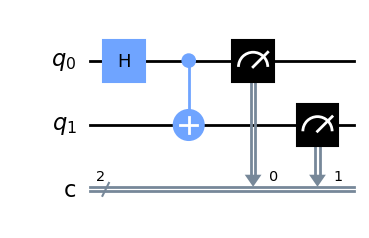

In [4]:
circuito.draw("mpl") # mpl é uma forma diferente de exibição. Tem somente efeito estético, é trivial.

Lemos os circuitos da esquerda para a direita, ou seja, as portas e operações à esquerda são aplicadas primeiro.

## Simulando o circuito

Como o resultado de uma medição de um qubit é aleatório - mas definido pela probabilidade de estar em um, ou outro estado - o circuito quântico é executado inúmeras vezes para que possamos saber qual o resultado mais apropriado. Dessa forma, com várias medições, é possível visualizar qual estado tiniha maior probabilidade, ou se estavam em superposição.

In [5]:
simulador = QasmSimulator()
circuito_compilado = transpile(circuito, simulador) #Transforma o programa para "linguagem de máquina quântica"
job = simulador.run(circuito_compilado, shots=1000) #Roda o programa 1000x. Este número pode ser alterado
resultado = job.result() #Guarda um objeto com o resultado da execução
contagens = resultado.get_counts(circuito) #Acessar este resultado

O total de contagens para os estados $\left|00\right>$ e $\left|11\right>$ é:

In [6]:
print(contagens) #'estado': quantas vezes ocorreu

{'11': 476, '00': 524}


Como as a probabilidade é muito próxima de 50%, os qubits estavam em estado de superposição. Nesse sentido, é imortante destacar que, o resultado não é exatamente 50% porque estamos utilizando um simulador. Ou seja, as condições, na vida real, de um qubit interferirão em seu resultado.

## Visualizando

Com os resultados em mãos, podemos colocá-lo em um histograma para facilitar sua visualização.

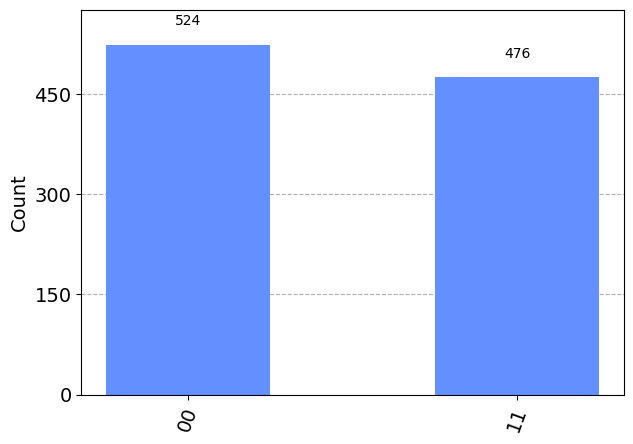

In [7]:
plot_histogram(contagens)

Note que estes resultados correspondem à execução do programa assim que foi executado. Os números estão sujeitos à mudança, e muito provavelmente, irão mudar assim que o algoritimo em python for executado de novo. Experimente fazer isso algumas vezes. Além disso, podemos também alterar o número em `shots` para obtermos diferentes resultados.